In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind


print("All packages installed successfully!")

All packages installed successfully!


In [2]:
# Load the dataset
df = pd.read_csv("Food_Production.csv")

In [3]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

###Exploratory Data Analysis

In [4]:
# Show the first few rows
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Show only columns with missing values

,0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),10
Eutrophying emissions per kilogram (gPO₄eq per kilogram),5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),16
Freshwater withdrawals per 1000kcal (liters per 1000kcal),13
Freshwater withdrawals per 100g protein (liters per 100g protein),17
Freshwater withdrawals per kilogram (liters per kilogram),5
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),10
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),16
Land use per 1000kcal (m² per 1000kcal),10
Land use per kilogram (m² per kilogram),5


In [6]:
# Get summary statistics
df.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327273,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


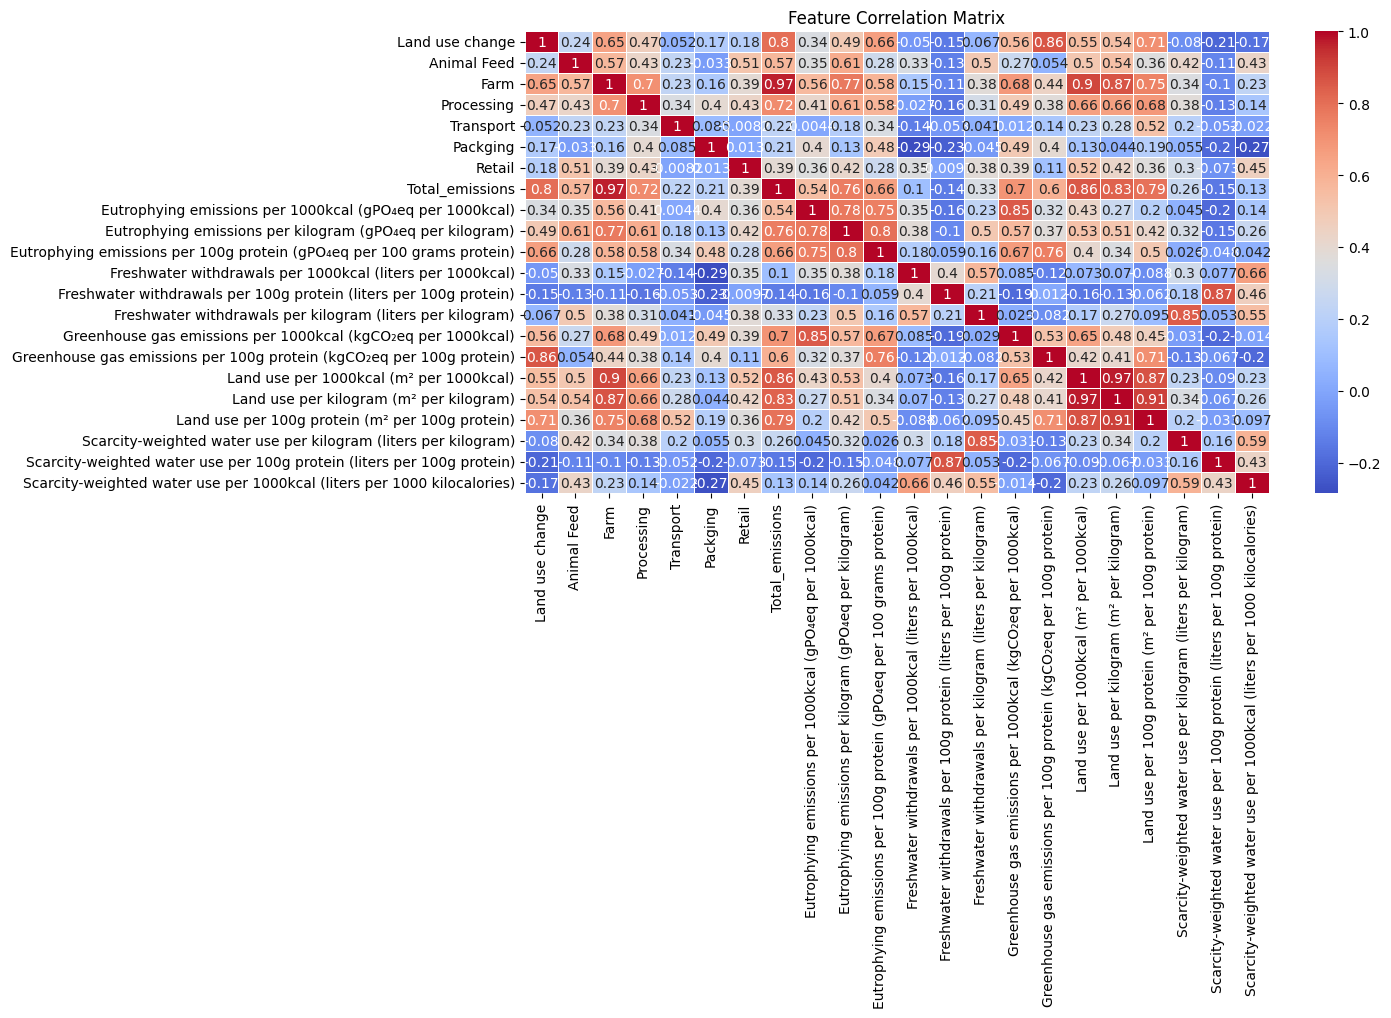

In [7]:
# Plot of correlation
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Key Insights:

*   Animal-based foods (due to feed and land use) contribute significantly to total emissions, eutrophication, and land use.
*   High protein and calorie-dense foods tend to have higher emissions and environmental impacts.
*   Water-intensive foods are often linked to higher GHG emissions, making water conservation crucial in food production


1. High Correlations with Total Emissions:

Farm stage emissions have a very strong correlation with Total_emissions (~0.97), indicating that farm-level activities contribute the most to total emissions.

Land use change and Animal Feed also show strong positive correlations with Total_emissions, suggesting that land-use activities and livestock feed are major emission drivers.

2. Greenhouse Gas (GHG) Emissions:

Strong correlation between GHG emissions per 100g protein and Land use per 100g protein (~0.86), meaning foods that require more land per protein unit tend to have higher GHG emissions.

GHG emissions per kcal and per kg are also closely related (~0.80), confirming that energy-dense foods tend to have higher emissions.

3. Eutrophication Emissions (Nutrient Pollution):

Eutrophication emissions per kg and Eutrophication emissions per 100g protein show strong correlations (~0.85+), implying that protein-rich foods may contribute more to water pollution.

Strong ties between Eutrophication emissions and Animal Feed indicate that animal-based food production has a significant impact on nutrient runoff.

4. Water Usage:

Freshwater withdrawals per kg and Scarcity-weighted water use per kg (~0.82) are highly correlated, reinforcing that foods requiring large water volumes also contribute significantly to water scarcity.

Freshwater withdrawals per 100g protein correlates (~0.71) with GHG emissions per 100g protein, indicating that water-intensive foods are often high in emissions.

5. Land Use:

Land use per kg and Farm emissions (~0.87) are strongly related, showing that extensive farming practices require large land areas.

Land use per kcal and Land use per kg (~0.90) suggests that foods high in land use per calorie are also high in land use per kg.

##Distribution of Carbon Emissions

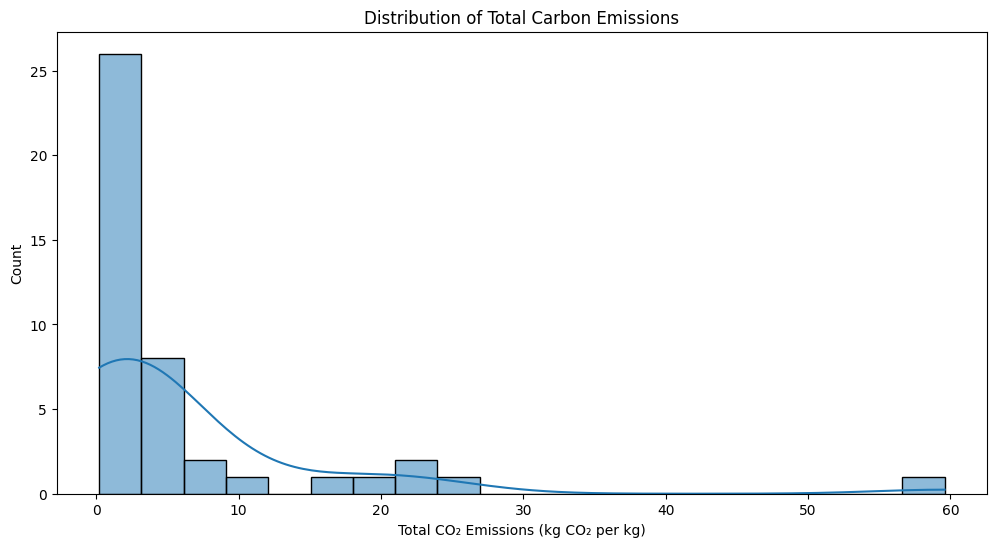

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Total_emissions"], bins=20, kde=True)
plt.title("Distribution of Total Carbon Emissions")
plt.xlabel("Total CO₂ Emissions (kg CO₂ per kg)")
plt.ylabel("Count")
plt.show()



*   The distribution is highly right-skewed, indicating that most values are concentrated near the lower end, while a few extremely high values push the tail towards the right.
*   The majority of carbon emissions appear to be below 10 kg CO₂ per kg, with a small number of data points exceeding 30 kg CO₂ per kg.
*   The presence of long tails suggests a high variance in emissions across different cases.




##Carbon Emissions Across Food Types

In [9]:
fig = px.bar(df, x="Food product", y="Farm", title="Carbon Emissions at the Farm Level")
fig.show()

##Business Analytical Questions



1.   Which food products have the highest and lowest carbon emissions?

In [10]:
# Sort by Total Emissions (Highest to Lowest)
top_5_highest = df.sort_values(by="Total_emissions", ascending=False).head(5)
top_5_lowest = df.sort_values(by="Total_emissions", ascending=True).head(5)

# Display results
print("Top 5 Highest Carbon Emission Foods:\n", top_5_highest[["Food product", "Total_emissions"]])
print("\nTop 5 Lowest Carbon Emission Foods:\n", top_5_lowest[["Food product", "Total_emissions"]])

Top 5 Highest Carbon Emission Foods:
          Food product  Total_emissions
33   Beef (beef herd)             59.6
35      Lamb & Mutton             24.5
39             Cheese             21.2
34  Beef (dairy herd)             21.1
32     Dark Chocolate             18.7

Top 5 Lowest Carbon Emission Foods:
        Food product  Total_emissions
11             Nuts              0.2
5          Potatoes              0.3
21   Onions & Leeks              0.3
22  Root Vegetables              0.3
25     Citrus Fruit              0.3


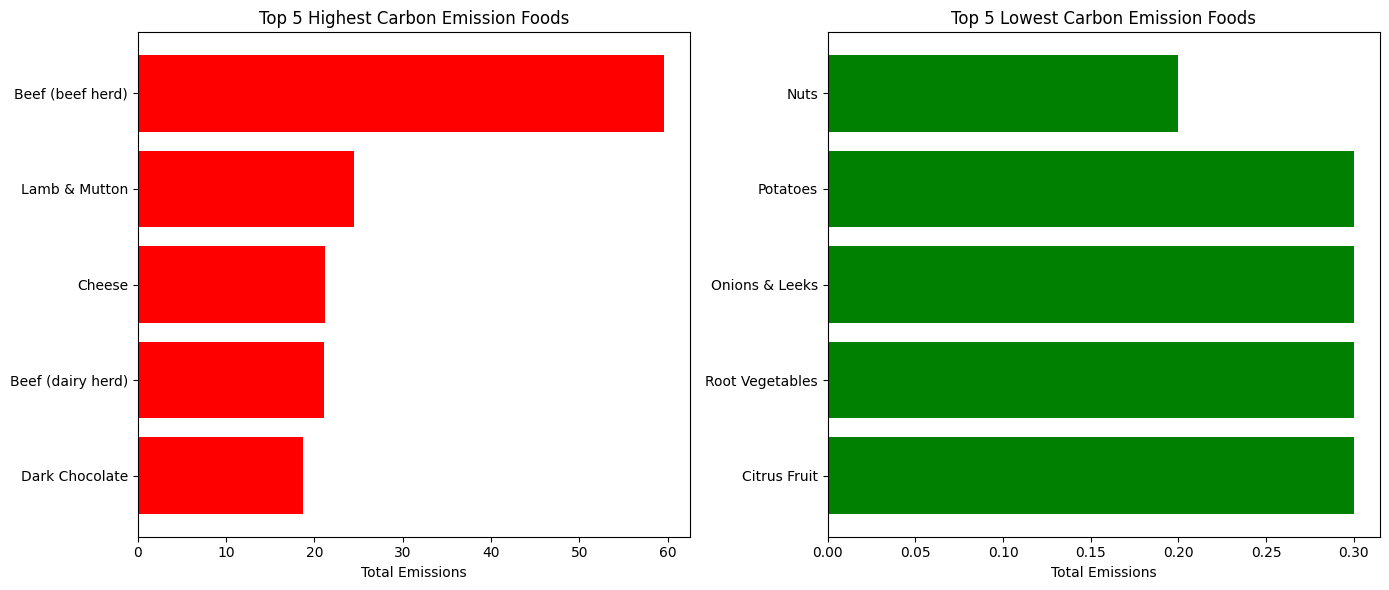

In [11]:
# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Top 5 Highest
axes[0].barh(top_5_highest["Food product"], top_5_highest["Total_emissions"], color="red")
axes[0].set_title("Top 5 Highest Carbon Emission Foods")
axes[0].set_xlabel("Total Emissions")
axes[0].invert_yaxis()  # Highest at top

# Plot Top 5 Lowest
axes[1].barh(top_5_lowest["Food product"], top_5_lowest["Total_emissions"], color="green")
axes[1].set_title("Top 5 Lowest Carbon Emission Foods")
axes[1].set_xlabel("Total Emissions")
axes[1].invert_yaxis()  # Lowest at top

# Adjust layout
plt.tight_layout()
plt.show()

2.   How do Plant-Based vs. Animal-Based foods compare in environmental impact?




In [12]:
#  need all columns that measure water consumption.

water_columns = [col for col in df.columns if "water" in col.lower() or "withdrawals" in col.lower()]
print(water_columns)

['Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']


In [13]:
# also need all columns that measure land footprint

land_columns = [col for col in df.columns if "land use" in col.lower()]
print(land_columns)

['Land use change', 'Land use per 1000kcal (m² per 1000kcal)', 'Land use per kilogram (m² per kilogram)', 'Land use per 100g protein (m² per 100g protein)']


In [14]:
#Now create the 'Total Water Use' and 'Total Land Use' Features

df["Total Water Use"] = df[
    [
        "Freshwater withdrawals per 1000kcal (liters per 1000kcal)",
        "Freshwater withdrawals per 100g protein (liters per 100g protein)",
        "Freshwater withdrawals per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per 100g protein (liters per 100g protein)",
        "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"
    ]
].sum(axis=1)

df["Total Land Use"] = df[
    [
        "Land use change",
        "Land use per 1000kcal (m² per 1000kcal)",
        "Land use per kilogram (m² per kilogram)",
        "Land use per 100g protein (m² per 100g protein)"
    ]
].sum(axis=1)

#Create Category based food(Animal based and Plant Based)
# Define lists for classification
animal_based = ["Beef (beef herd)", "Beef (dairy herd)", "Lamb & Mutton",
                "Pig Meat", "Poultry Meat", "Milk", "Cheese", "Eggs",
                "Fish (farmed)", "Shrimps (farmed)"]

# Apply classification
df["Category"] = df["Food product"].apply(lambda x: "Animal-based" if x in animal_based else "Plant-based")

In [15]:
scaler = StandardScaler()
df[["Total_emissions", "Total Water Use", "Total Land Use"]] = scaler.fit_transform(
    df[["Total_emissions", "Total Water Use", "Total Land Use"]]
)

              Total_emissions  Total Water Use  Total Land Use
Category                                                      
Animal-based         1.003756         0.416586        0.822964
Plant-based         -0.304169        -0.126238       -0.249383


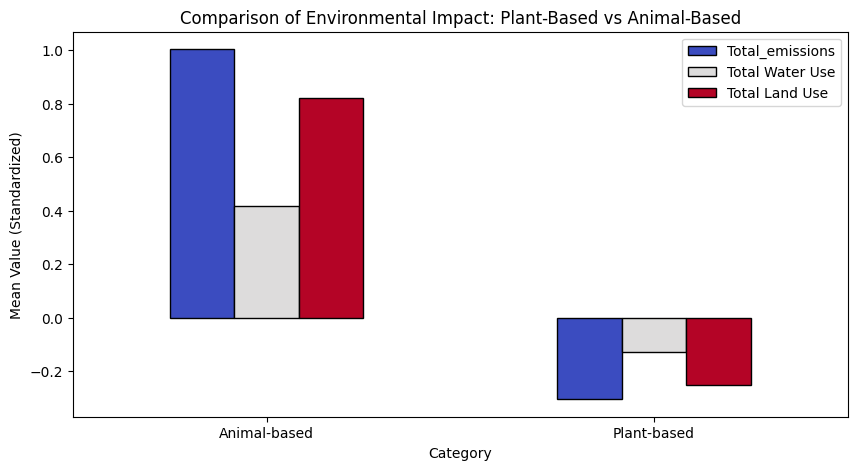

In [16]:
# Group by Category and calculate mean emissions, water, and land use
category_means = df.groupby("Category")[["Total_emissions", "Total Water Use", "Total Land Use"]].mean()

# Display results
print(category_means)

# Visualize
category_means.plot(kind="bar", figsize=(10, 5), colormap="coolwarm", edgecolor="black")
plt.title("Comparison of Environmental Impact: Plant-Based vs Animal-Based")
plt.ylabel("Mean Value (Standardized)")
plt.xticks(rotation=0)
plt.show()


*   Animal-based foods have a significantly higher environmental impact across emissions, water use, and land use compared to plant-based foods.
*   Total emissions and land use are particularly high for animal-based foods, indicating they contribute more to environmental degradation.
*   Plant-based foods show a much lower impact, reinforcing the idea that shifting to a plant-based diet could reduce environmental strain.




3. What is the correlation between Land use, Water use and Emissions?





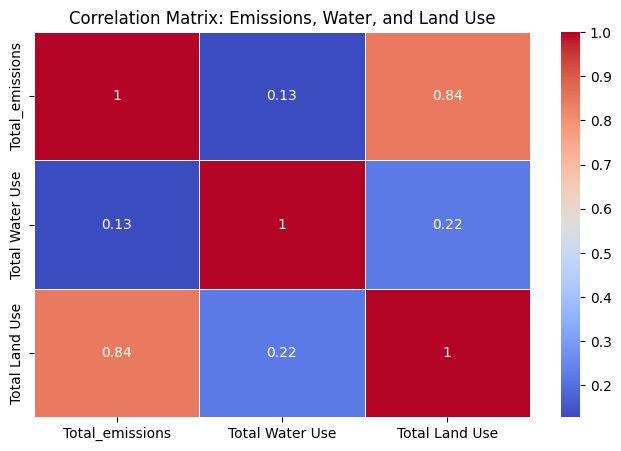

In [17]:
# Compute correlation matrix
correlation_matrix = df[["Total_emissions", "Total Water Use", "Total Land Use"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Emissions, Water, and Land Use")
plt.show()


*   Strong correlation (0.84) between emissions and land use suggests that foods requiring more land also produce more greenhouse gas emissions.
*   Low correlation (0.099) between water use and emissions implies that water-intensive foods are not necessarily the highest contributors to emissions.
*   Moderate correlation (0.18) between water use and land use indicates that some land-intensive foods also require significant water resources.



4. Which food production stage contributes most to Emissions?



Farm               3.469767
Land use change    1.260465
Animal Feed        0.453488
Packging           0.269767
Processing         0.253488
Transport          0.195349
Retail             0.069767
dtype: float64


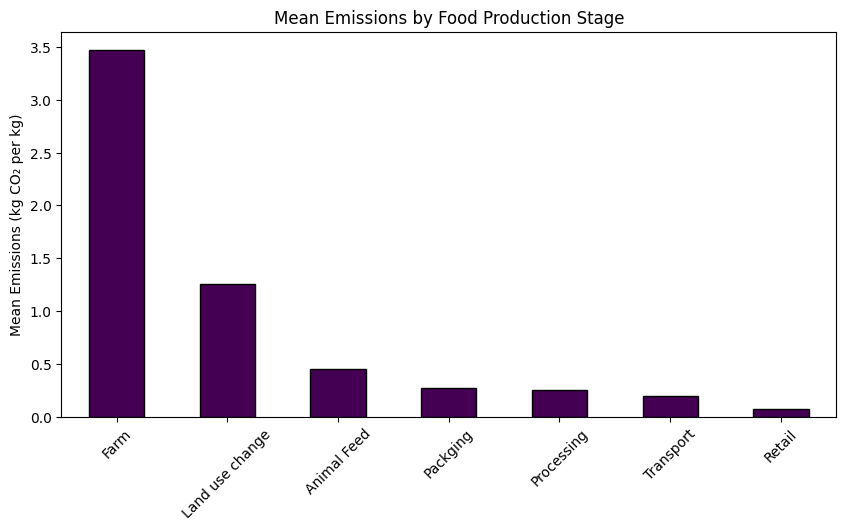

<Figure size 640x480 with 0 Axes>

In [18]:
# Select only production stage columns
stage_columns = ["Land use change", "Animal Feed", "Farm", "Processing", "Transport", "Packging", "Retail"]

# Compute mean emissions per stage
stage_means = df[stage_columns].mean().sort_values(ascending=False)

# Display results
print(stage_means)

# Visualize
stage_means.plot(kind="bar", figsize=(10, 5), colormap="viridis", edgecolor="black")
plt.title("Mean Emissions by Food Production Stage")
plt.ylabel("Mean Emissions (kg CO₂ per kg)")
plt.xticks(rotation=45)
plt.show()
plt.savefig("my_visualization.jpg", dpi=300)  # JPG

5. How do different food types impact the environment?

In [19]:
# List all unique food products
unique_foods = df["Food product"].unique()
unique_foods

array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [20]:
# Define mapping for food types
food_types = {
    "Wheat & Rye (Bread)": "Cereals & Grains",
    "Maize (Meal)": "Cereals & Grains",
    "Barley (Beer)": "Cereals & Grains",
    "Oatmeal": "Cereals & Grains",
    "Rice": "Cereals & Grains",

    "Potatoes": "Root & Tubers",
    "Cassava": "Root & Tubers",

    "Cane Sugar": "Sugars",
    "Beet Sugar": "Sugars",

    "Other Pulses": "Legumes & Pulses",
    "Peas": "Legumes & Pulses",
    "Soymilk": "Legumes & Pulses",
    "Tofu": "Legumes & Pulses",

    "Nuts": "Nuts & Seeds",
    "Groundnuts": "Nuts & Seeds",

    "Soybean Oil": "Vegetable Oils",
    "Palm Oil": "Vegetable Oils",
    "Sunflower Oil": "Vegetable Oils",
    "Rapeseed Oil": "Vegetable Oils",
    "Olive Oil": "Vegetable Oils",

    "Tomatoes": "Vegetables",
    "Onions & Leeks": "Vegetables",
    "Root Vegetables": "Vegetables",
    "Brassicas": "Vegetables",
    "Other Vegetables": "Vegetables",

    "Citrus Fruit": "Fruits",
    "Bananas": "Fruits",
    "Apples": "Fruits",
    "Berries & Grapes": "Fruits",
    "Other Fruit": "Fruits",

    "Wine": "Beverages & Processed",
    "Coffee": "Beverages & Processed",
    "Dark Chocolate": "Beverages & Processed",

    "Beef (beef herd)": "Meat",
    "Beef (dairy herd)": "Meat",
    "Lamb & Mutton": "Meat",
    "Pig Meat": "Meat",
    "Poultry Meat": "Meat",

    "Milk": "Dairy & Eggs",
    "Cheese": "Dairy & Eggs",
    "Eggs": "Dairy & Eggs",

    "Fish (farmed)": "Seafood",
    "Shrimps (farmed)": "Seafood"
}

# Assign new 'Food Type' column
df["Food Type"] = df["Food product"].map(food_types)

# Display sample rows
df[["Food product", "Food Type"]].head(10)

,Food product,Food Type
0,Wheat & Rye (Bread),Cereals & Grains
1,Maize (Meal),Cereals & Grains
2,Barley (Beer),Cereals & Grains
3,Oatmeal,Cereals & Grains
4,Rice,Cereals & Grains
5,Potatoes,Root & Tubers
6,Cassava,Root & Tubers
7,Cane Sugar,Sugars
8,Beet Sugar,Sugars
9,Other Pulses,Legumes & Pulses


                       Total_emissions  Total Water Use  Total Land Use
Food Type                                                              
Beverages & Processed         0.600053        -0.675016        0.392101
Cereals & Grains             -0.398124        -0.401418       -0.362854
Dairy & Eggs                  0.339911         0.684506        0.141048
Fruits                       -0.513742         0.799903       -0.254472
Legumes & Pulses             -0.421247        -0.550154       -0.321477
Meat                          1.708068         0.551319        1.695143
Nuts & Seeds                 -0.450152         1.517454       -0.269517
Root & Tubers                -0.517596        -0.613702       -0.283377
Seafood                       0.238744        -0.322124       -0.334608
Sugars                       -0.382708        -0.565140       -0.375628
Vegetable Oils               -0.058975        -0.247560       -0.281935
Vegetables                   -0.519523        -0.274411       -0

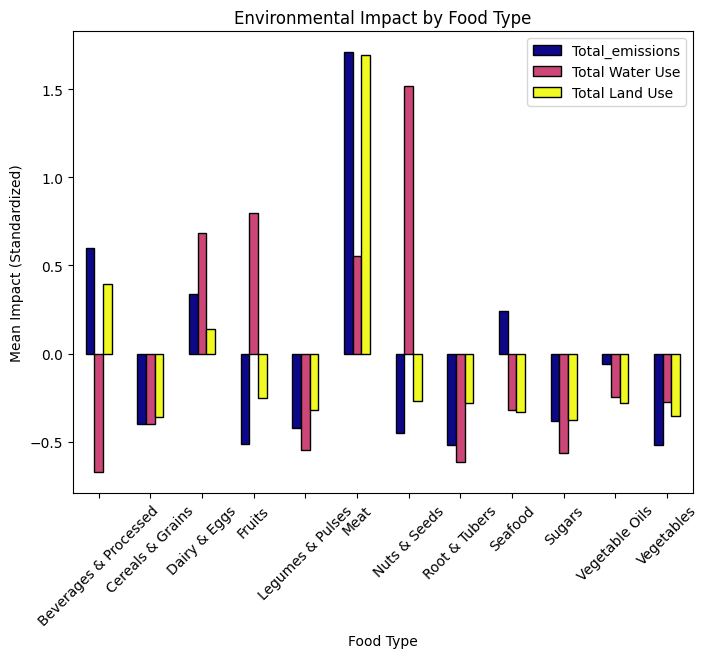

In [35]:
# Group by food type and calculate mean impact
food_type_means = df.groupby("Food Type")[["Total_emissions", "Total Water Use", "Total Land Use"]].mean()

# Display results
print(food_type_means)

# Visualize
food_type_means.plot(kind="bar", figsize=(8, 6), colormap="plasma", edgecolor="black")
plt.title("Environmental Impact by Food Type")
plt.ylabel("Mean Impact (Standardized)")
plt.xticks(rotation=45)
plt.show()



*   Meat, nuts & seeds, and dairy & eggs have the highest environmental impact across all three categories (emissions, water use, and land use).
*   Legumes, vegetables, and cereals have lower environmental impacts, reinforcing their sustainability.
*   Water use is particularly high for nuts & seeds, likely due to irrigation requirements.
*   Beverages & processed foods show a negative impact for water use, suggesting they may have a lower overall water footprint.


6. What are the top five contributors to Eutrophication?

In [22]:
# Sort foods by Eutrophying Emissions (TOP 5)
top_eutrophying = df.sort_values(by="Eutrophying emissions per kilogram (gPO₄eq per kilogram)", ascending=False).head(5)

# Display the top 5 contributors
print(top_eutrophying[["Food product", "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]])

         Food product  \
34  Beef (dairy herd)   
33   Beef (beef herd)   
41      Fish (farmed)   
31             Coffee   
39             Cheese   

    Eutrophying emissions per kilogram (gPO₄eq per kilogram)  
34                                             365.29         
33                                             301.41         
41                                             235.12         
31                                             110.52         
39                                              98.37         


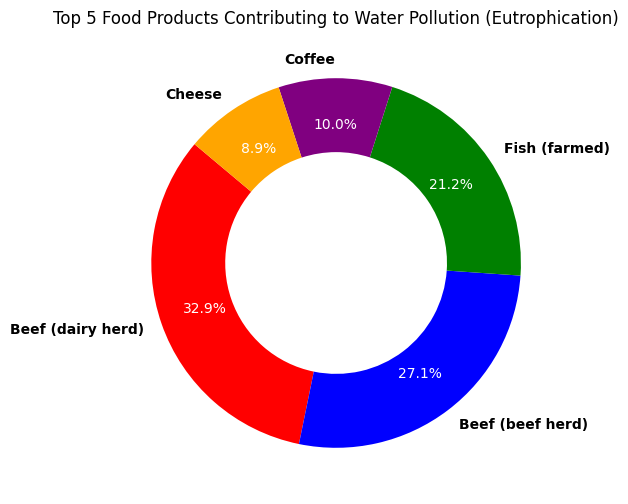

In [23]:
# Donut plot with clearer labels
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    top_eutrophying["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"],
    labels=top_eutrophying["Food product"],
    autopct="%1.1f%%",
    startangle=140,
    colors=["red", "blue", "green", "purple", "orange"],
    wedgeprops=dict(width=0.4),
    pctdistance=0.75,   # Position percentages closer to center
    labeldistance=1.1   # Push labels outward
)

# Style adjustments
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight("bold")

# Add title
plt.title("Top 5 Food Products Contributing to Water Pollution (Eutrophication)")
plt.show()

7. Do we have cluster of group of foods based on their environmental impact?

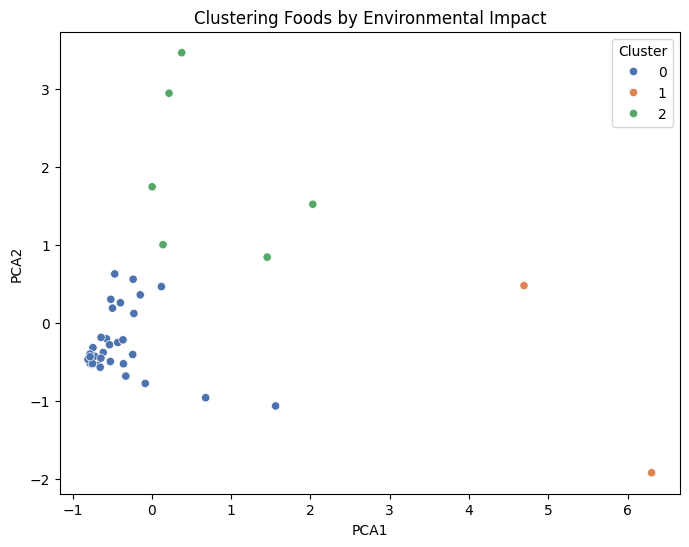

In [24]:
# Select relevant features
X = df[["Total_emissions", "Total Water Use", "Total Land Use"]]

# Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="deep")
plt.title("Clustering Foods by Environmental Impact")
plt.show()

##Key Insights;

This plot represents food items clustered based on their environmental impact using Principal Component Analysis (PCA) for dimensionality reduction.

Three Distinct Clusters:



*   Cluster 0 (Blue): The largest cluster, containing the majority of food items with low environmental impact.
*   Cluster 1 (Orange): A small group of outliers with extremely high environmental impact, likely representing foods like beef and dairy.
*   Cluster 2 (Green): Intermediate-impact foods, possibly representing nuts, seeds, and certain fish products.


Separation in PCA Space:


*   Cluster 1 (orange points) is far apart from the others, showing that these food items have a significantly different impact.List item
*   Cluster 2 (green points) is more spread out but still separate from the low-impact group.

*   Cluster 0 (blue points) is tightly packed, indicating similar characteristics among the foods in this group.



##Key Takeaways:


*   Low-impact foods dominate the dataset, reinforcing the sustainability of plant-based diets.
*   High-impact foods form a clear separate group, emphasizing the outsized impact of certain animal-based products.
*   Intermediate foods have mixed impact levels, possibly reflecting factors like water use or emissions differences.


#Principle Component Analysis

8. What is the environmental impact by cluster?

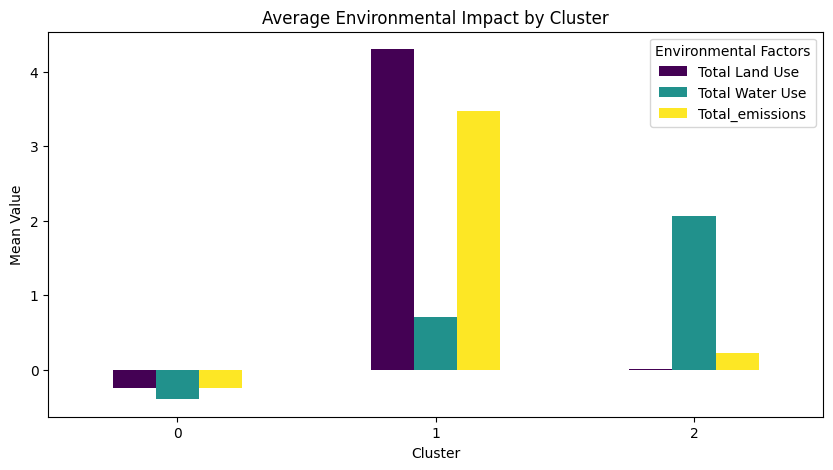

In [25]:
# Compare emissions, land use, and water use across clusters
cluster_summary = df.groupby("Cluster")[["Total Land Use", "Total Water Use", "Total_emissions"]].mean()

# Plot cluster characteristics
cluster_summary.plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.title("Average Environmental Impact by Cluster")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Environmental Factors")
plt.show()

##Insights

*   The bar chart shows the average land use, water use, and emissions per cluster.
*   Some clusters have high land use but moderate emissions, while others have high emissions but lower land use.
*   Certain clusters have significantly higher water use, indicating food types that are more water-intensive.
*   High land use & emissions clusters → Likely dominated by animal-based products.
*   High water use clusters → Could be plant-based foods like nuts or rice.

9. What is the environmental impact by Category (Plant Based and Animal Based)

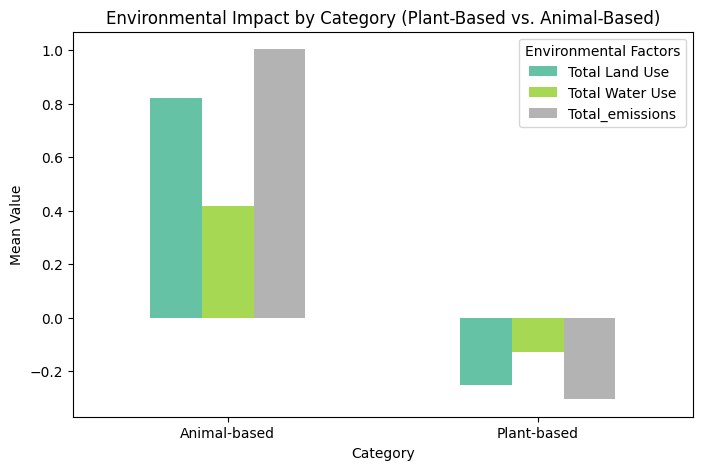

In [26]:
# Compare emissions, land use, and water use between Plant-Based and Animal-Based categories
category_summary = df.groupby("Category")[["Total Land Use", "Total Water Use", "Total_emissions"]].mean()

# Plot comparison
category_summary.plot(kind="bar", figsize=(8, 5), colormap="Set2")
plt.title("Environmental Impact by Category (Plant-Based vs. Animal-Based)")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Environmental Factors")
plt.show()

##Key Insights:

*   Animal-Based products have much higher emissions and land use than Plant-Based products.
*   Water use is more balanced, with some Plant-Based foods; like nuts, rice using significant amounts.
*   This confirms that reducing animal-based foods can lower environmental impact, particularly in terms of emissions and land use.​




10. What are the Environmental factors across Category?

/tmp/ipython-input-2711341118.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2711341118.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2711341118.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




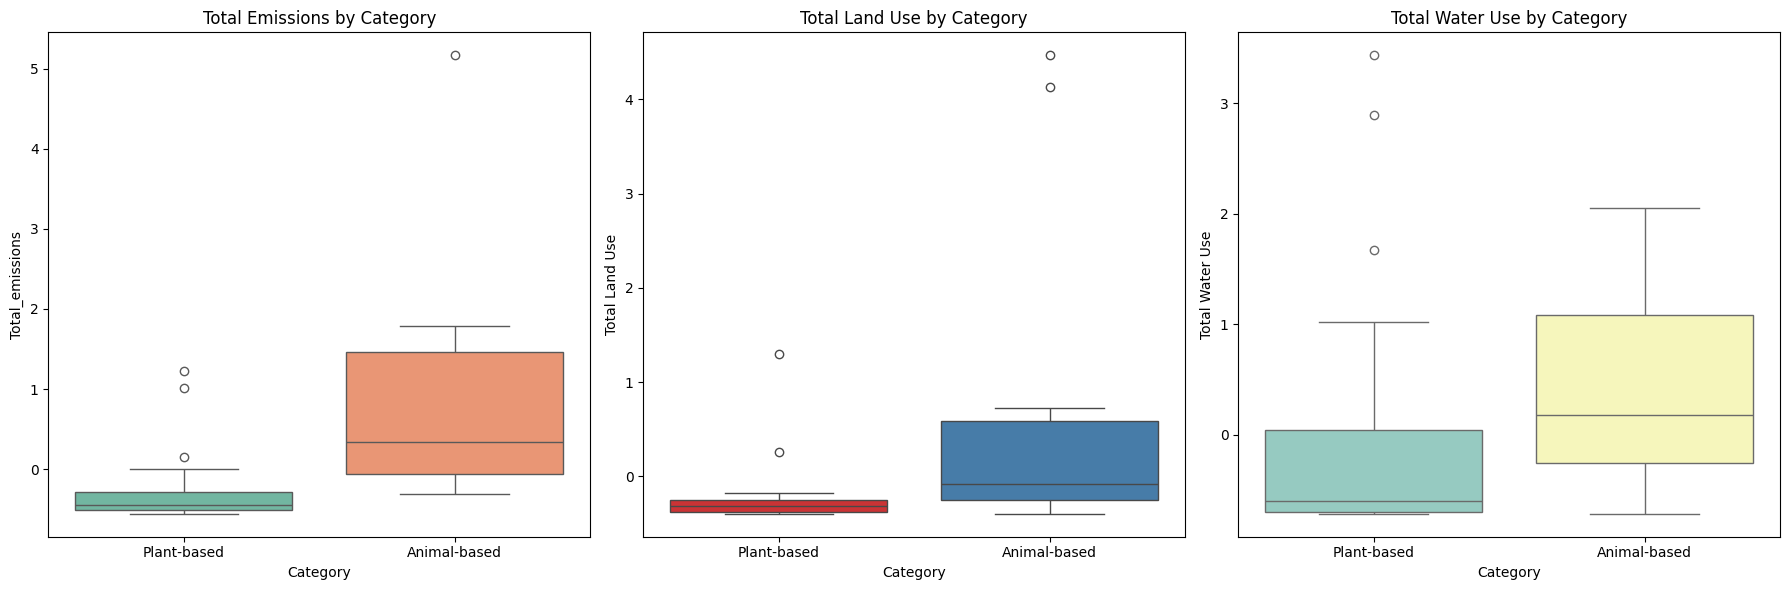

In [27]:
# Grouped boxplots to compare emissions and resource use across Categories
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Emissions by Category
sns.boxplot(data=df, x="Category", y="Total_emissions", ax=axes[0], palette="Set2")
axes[0].set_title("Total Emissions by Category")

# Total Land Use by Category
sns.boxplot(data=df, x="Category", y="Total Land Use", ax=axes[1], palette="Set1")
axes[1].set_title("Total Land Use by Category")

# Total Water Use by Category
sns.boxplot(data=df, x="Category", y="Total Water Use", ax=axes[2], palette="Set3")
axes[2].set_title("Total Water Use by Category")

plt.tight_layout()
plt.show()

##Insights

*   Emissions: Animal-based products generally have higher emissions than plant-based ones.
*   Land Use: Animal-based products tend to require significantly more land.
*   Water Use: There is a wider range of water use across both categories, but some animal-based products show extreme values.


11. What are the Top 10 Food Products by Emissions?

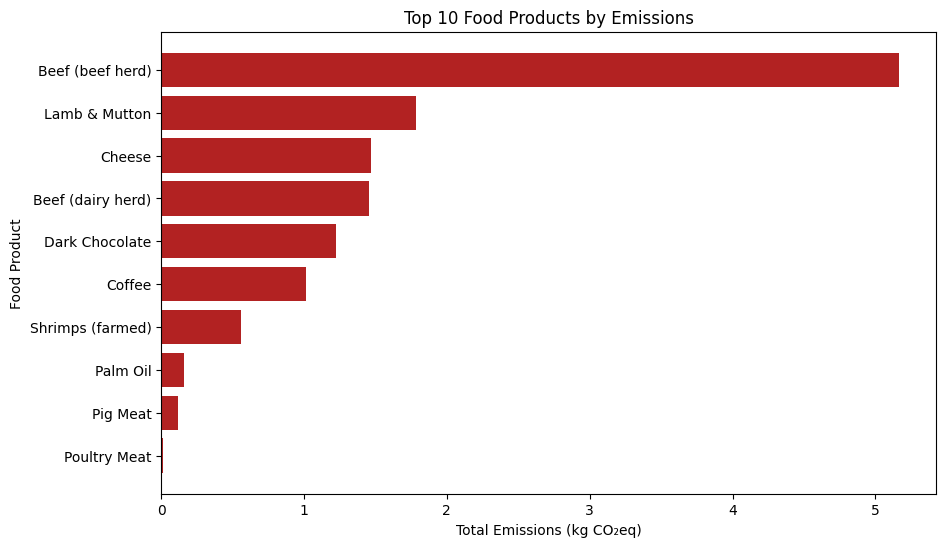

In [28]:
# Ensure numerical columns are properly parsed
fp_numeric_cols = ['Total_emissions', 'Total Land Use', 'Total Water Use',
                   'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']

# Sorting for top 10 food products by emissions
top_10_emissions = df.nlargest(10, 'Total_emissions')

# Visualization: Top 10 Food Products by Emissions
plt.figure(figsize=(10, 6))
plt.barh(top_10_emissions['Food product'], top_10_emissions['Total_emissions'], color='firebrick')
plt.xlabel("Total Emissions (kg CO₂eq)")
plt.ylabel("Food Product")
plt.title("Top 10 Food Products by Emissions")
plt.gca().invert_yaxis()
plt.show()

12. What are the Top 10 Food Products by Land Use?

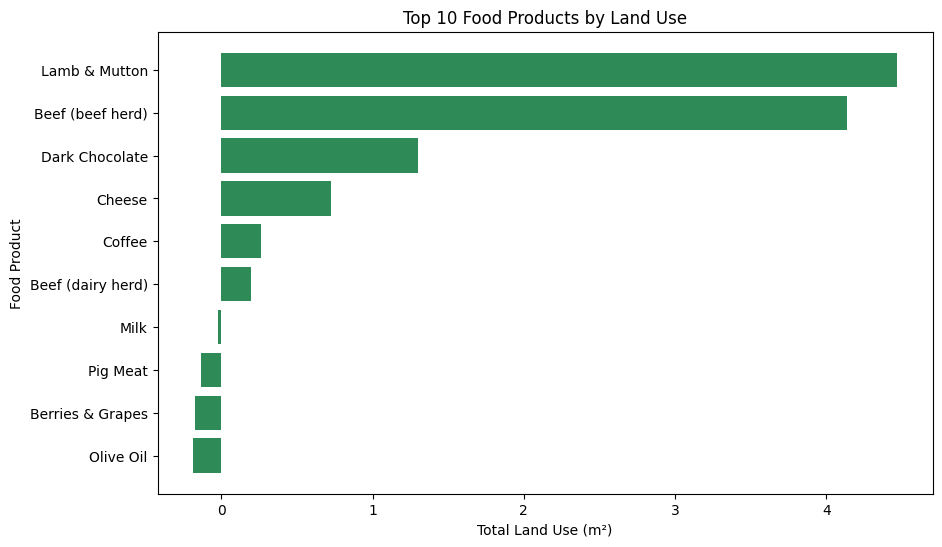

In [29]:
# Sorting for top 10 food products by land use
top_10_land_use = df.nlargest(10, 'Total Land Use')

# Visualization: Top 10 Food Products by Land Use
plt.figure(figsize=(10, 6))
plt.barh(top_10_land_use['Food product'], top_10_land_use['Total Land Use'], color='seagreen')
plt.xlabel("Total Land Use (m²)")
plt.ylabel("Food Product")
plt.title("Top 10 Food Products by Land Use")
plt.gca().invert_yaxis()
plt.show()

13. What are the Top 10 Food Products by Water Use?

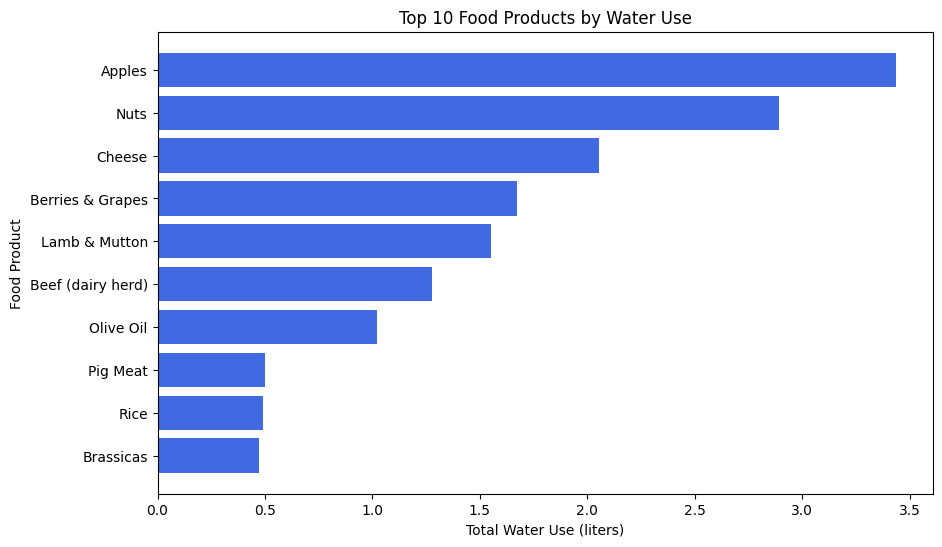

In [30]:
# Sorting for top 10 food products by water use
top_10_water_use = df.nlargest(10, 'Total Water Use')

# Visualization: Top 10 Food Products by Water Use
plt.figure(figsize=(10, 6))
plt.barh(top_10_water_use['Food product'], top_10_water_use['Total Water Use'], color='royalblue')
plt.xlabel("Total Water Use (liters)")
plt.ylabel("Food Product")
plt.title("Top 10 Food Products by Water Use")
plt.gca().invert_yaxis()
plt.show()

14. What are the Top 10 Food Types by Emissions?

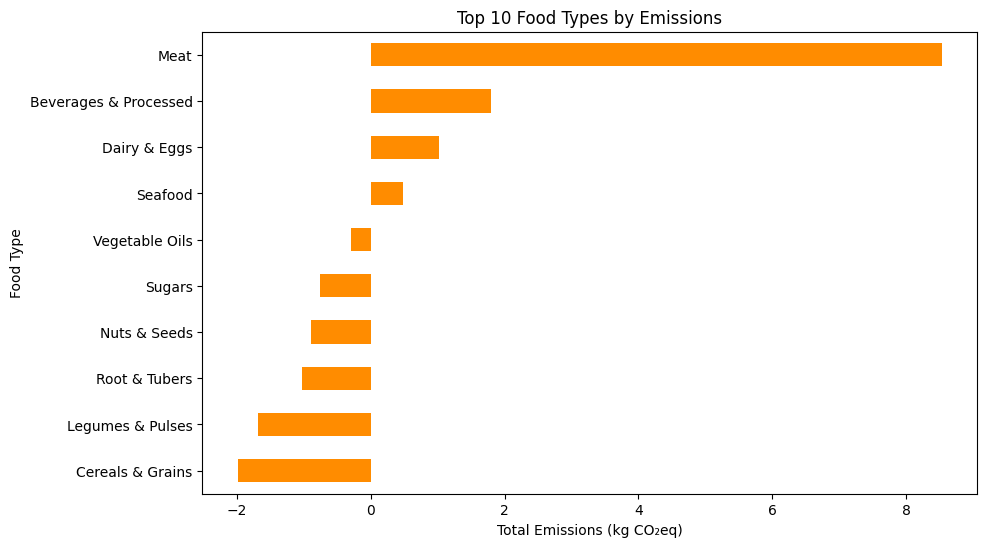

In [31]:
# Aggregating emissions by food type
top_10_food_type_emissions = df.groupby('Food Type')['Total_emissions'].sum().nlargest(10)

# Visualization: Top 10 Food Types by Emissions
plt.figure(figsize=(10, 6))
top_10_food_type_emissions.sort_values().plot(kind='barh', color='darkorange')
plt.xlabel("Total Emissions (kg CO₂eq)")
plt.ylabel("Food Type")
plt.title("Top 10 Food Types by Emissions")
plt.show()

15. What are the Top 10 Food Types by Land Use?

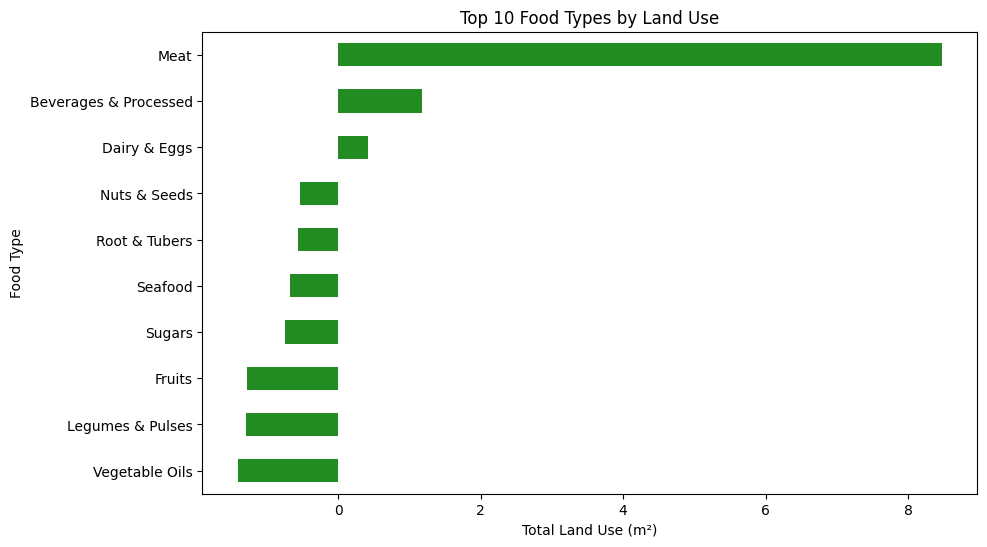

In [32]:
# Aggregating land use by food type
top_10_food_type_land_use = df.groupby('Food Type')['Total Land Use'].sum().nlargest(10)

# Visualization: Top 10 Food Types by Land Use
plt.figure(figsize=(10, 6))
top_10_food_type_land_use.sort_values().plot(kind='barh', color='forestgreen')
plt.xlabel("Total Land Use (m²)")
plt.ylabel("Food Type")
plt.title("Top 10 Food Types by Land Use")
plt.show()

16. What are the Top 10 Food Types by Water Use?

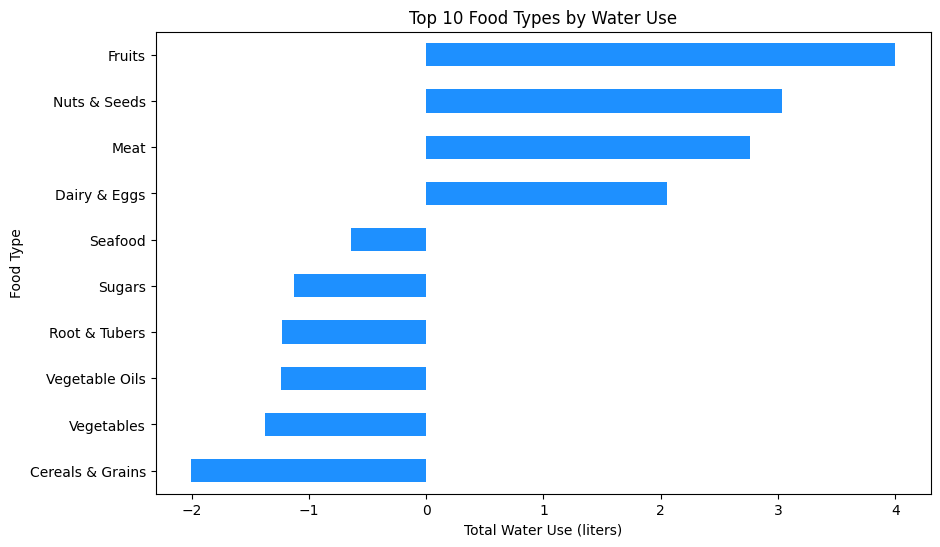

In [33]:
# Aggregating water use by food type
top_10_food_type_water_use = df.groupby('Food Type')['Total Water Use'].sum().nlargest(10)

# Visualization: Top 10 Food Types by Water Use
plt.figure(figsize=(10, 6))
top_10_food_type_water_use.sort_values().plot(kind='barh', color='dodgerblue')
plt.xlabel("Total Water Use (liters)")
plt.ylabel("Food Type")
plt.title("Top 10 Food Types by Water Use")
plt.show()